### Pull Corona data from CDS 

[Corona Data Scraper](https://coronadatascraper.com/#home)


In [1]:
import numpy as np
import pandas as pd


In [1]:
import folium

In [2]:
timeseries = pd.read_csv('https://coronadatascraper.com/timeseries.csv', parse_dates=['date'])

display('Timeseries:')
display(timeseries.head())

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


'Timeseries:'

,name,level,city,county,state,country,population,lat,long,url,...,recovered,active,tested,hospitalized,hospitalized_current,discharged,icu,icu_current,growthFactor,date
0,"Antwerp, Flanders, Belgium",county,NaN,Antwerp,Flanders,Belgium,1847486.0,51.2485,4.7175,https://epistat.wiv-isp.be/,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-22
1,"Antwerp, Flanders, Belgium",county,NaN,Antwerp,Flanders,Belgium,1847486.0,51.2485,4.7175,https://epistat.wiv-isp.be/,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2020-01-23
2,"Antwerp, Flanders, Belgium",county,NaN,Antwerp,Flanders,Belgium,1847486.0,51.2485,4.7175,https://epistat.wiv-isp.be/,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2020-01-24
3,"Antwerp, Flanders, Belgium",county,NaN,Antwerp,Flanders,Belgium,1847486.0,51.2485,4.7175,https://epistat.wiv-isp.be/,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2020-01-25
4,"Antwerp, Flanders, Belgium",county,NaN,Antwerp,Flanders,Belgium,1847486.0,51.2485,4.7175,https://epistat.wiv-isp.be/,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2020-01-26


In [6]:
timeseries['country'].value_counts()

United States    255848
Slovenia          13845
Russia             5377
China              4718
Latvia             4295
                  ...  
Comoros              49
Lesotho              36
Guadeloupe            2
Réunion               1
Martinique            1
Name: country, Length: 195, dtype: int64

In [4]:
USA = timeseries[(timeseries.country == 'United States') & (timeseries.level == 'county')]

In [5]:
display(USA.head())

,name,level,city,county,state,country,population,lat,long,url,...,recovered,active,tested,hospitalized,hospitalized_current,discharged,icu,icu_current,growthFactor,date
22773,"Washoe County, Nevada, United States",county,NaN,Washoe County,Nevada,United States,471519.0,40.582,-119.5885,https://services.arcgis.com/iCGWaR7ZHc5saRIl/a...,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-05
22774,"Washoe County, Nevada, United States",county,NaN,Washoe County,Nevada,United States,471519.0,40.582,-119.5885,https://services.arcgis.com/iCGWaR7ZHc5saRIl/a...,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2020-03-06
22775,"Washoe County, Nevada, United States",county,NaN,Washoe County,Nevada,United States,471519.0,40.582,-119.5885,https://services.arcgis.com/iCGWaR7ZHc5saRIl/a...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2020-03-07
22776,"Washoe County, Nevada, United States",county,NaN,Washoe County,Nevada,United States,471519.0,40.582,-119.5885,https://services.arcgis.com/iCGWaR7ZHc5saRIl/a...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2020-03-08
22777,"Washoe County, Nevada, United States",county,NaN,Washoe County,Nevada,United States,471519.0,40.582,-119.5885,https://services.arcgis.com/iCGWaR7ZHc5saRIl/a...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2020-03-09


In [6]:
len(USA)

272109

In [7]:
USA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 272109 entries, 22773 to 345623
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   name                  272109 non-null  object        
 1   level                 272109 non-null  object        
 2   city                  0 non-null       object        
 3   county                272109 non-null  object        
 4   state                 272109 non-null  object        
 5   country               272109 non-null  object        
 6   population            272047 non-null  float64       
 7   lat                   272047 non-null  float64       
 8   long                  272047 non-null  float64       
 9   url                   272109 non-null  object        
 10  aggregate             272109 non-null  object        
 11  tz                    272047 non-null  object        
 12  cases                 267305 non-null  float64       


In [8]:
king = USA[USA.county == 'King County']

In [21]:
king

,name,level,city,county,state,country,population,lat,long,url,...,recovered,active,tested,hospitalized,hospitalized_current,discharged,icu,icu_current,growthFactor,date
255657,"King County, Washington, United States",county,NaN,King County,Washington,United States,2252782.0,47.433,-121.797,https://services8.arcgis.com/rGGrs6HCnw87OFOT/...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-22
255658,"King County, Washington, United States",county,NaN,King County,Washington,United States,2252782.0,47.433,-121.797,https://services8.arcgis.com/rGGrs6HCnw87OFOT/...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,2020-01-23
255659,"King County, Washington, United States",county,NaN,King County,Washington,United States,2252782.0,47.433,-121.797,https://services8.arcgis.com/rGGrs6HCnw87OFOT/...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,2020-01-24
255660,"King County, Washington, United States",county,NaN,King County,Washington,United States,2252782.0,47.433,-121.797,https://services8.arcgis.com/rGGrs6HCnw87OFOT/...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,2020-01-25
255661,"King County, Washington, United States",county,NaN,King County,Washington,United States,2252782.0,47.433,-121.797,https://services8.arcgis.com/rGGrs6HCnw87OFOT/...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,2020-01-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255800,"King County, Washington, United States",county,NaN,King County,Washington,United States,2252782.0,47.433,-121.797,https://services8.arcgis.com/rGGrs6HCnw87OFOT/...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.01,2020-06-13
255801,"King County, Washington, United States",county,NaN,King County,Washington,United States,2252782.0,47.433,-121.797,https://services8.arcgis.com/rGGrs6HCnw87OFOT/...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,2020-06-14
255802,"King County, Washington, United States",county,NaN,King County,Washington,United States,2252782.0,47.433,-121.797,https://services8.arcgis.com/rGGrs6HCnw87OFOT/...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.01,2020-06-15
255803,"King County, Washington, United States",county,NaN,King County,Washington,United States,2252782.0,47.433,-121.797,https://services8.arcgis.com/rGGrs6HCnw87OFOT/...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.01,2020-06-16


In [9]:
king.describe()

,population,lat,long,cases,deaths,recovered,active,tested,hospitalized,hospitalized_current,discharged,icu,icu_current,growthFactor
count,156.0,156.000,156.000,156.000000,117.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,155.000000
mean,2252782.0,47.433,-121.797,3884.288462,353.65812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.079613
std,0.0,0.000,0.000,3532.001030,215.57206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.292233
min,2252782.0,47.433,-121.797,1.000000,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.990000
25%,2252782.0,47.433,-121.797,9.250000,136.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
50%,2252782.0,47.433,-121.797,3776.000000,416.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.010000
75%,2252782.0,47.433,-121.797,7482.750000,559.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.040000
max,2252782.0,47.433,-121.797,9573.000000,606.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000


In [10]:
import matplotlib.pyplot as plt

In [11]:
ts_deaths = king[['deaths']].set_index(king.date)

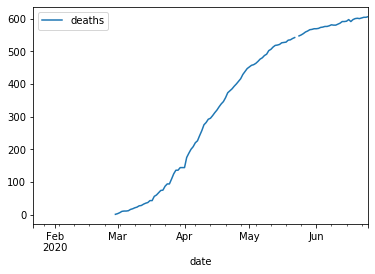

In [12]:
ts_deaths.plot()

In [13]:
counties = USA.groupby(['county'], as_index=False)['tested'].sum().sort_values('tested',ascending=False)

In [14]:
counties

,county,tested
983,Los Angeles County,32225550.0
395,Cook County,20197287.0
1224,Orange County,11042254.0
1084,Miami-Dade County,9874959.0
1447,San Diego County,9631080.0
...,...,...
695,Habersham County,0.0
694,Gwinnett County,0.0
693,Guthrie County,0.0
692,Gunnison County,0.0


In [15]:
LAC = USA[USA.county == 'Los Angeles County']

In [16]:
lac_tested = LAC[['deaths']].set_index(LAC.date)

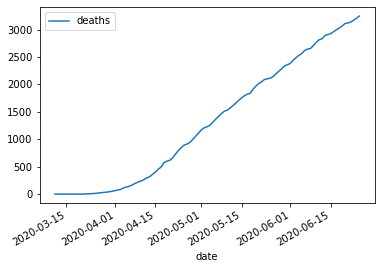

In [17]:
lac_tested.plot()

 These are the facts (**bold** indicates requested by Blend)
 
**cases**      
**deaths**       
recovered      
active                       
**tested**                 
**hospitalized**               
**hospitalized_current**         
discharged                  
**icu**                        
**icu_current**     

In [43]:
current = USA[USA.date == '2020-06-16']

In [45]:
len(current)

3012

In [46]:
current.to_csv('CDS_county_covid_06-16')

In [18]:
NY = USA[USA.state == 'New York']

In [19]:
NY.head()

,name,level,city,county,state,country,population,lat,long,url,...,recovered,active,tested,hospitalized,hospitalized_current,discharged,icu,icu_current,growthFactor,date
192641,"Albany County, New York, United States",county,NaN,Albany County,New York,United States,305506.0,42.614,-73.971,https://raw.githubusercontent.com/nytimes/covi...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-12
192642,"Albany County, New York, United States",county,NaN,Albany County,New York,United States,305506.0,42.614,-73.971,https://raw.githubusercontent.com/nytimes/covi...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,2020-03-13
192643,"Albany County, New York, United States",county,NaN,Albany County,New York,United States,305506.0,42.614,-73.971,https://raw.githubusercontent.com/nytimes/covi...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.50,2020-03-14
192644,"Albany County, New York, United States",county,NaN,Albany County,New York,United States,305506.0,42.614,-73.971,https://raw.githubusercontent.com/nytimes/covi...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.20,2020-03-15
192645,"Albany County, New York, United States",county,NaN,Albany County,New York,United States,305506.0,42.614,-73.971,https://raw.githubusercontent.com/nytimes/covi...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.09,2020-03-16


In [20]:
len(NY)

5848

In [25]:
counties = NY.groupby(['county'], as_index=False)['cases'].sum().sort_values('cases',ascending=False)

In [26]:
counties

,county,cases
28,New York County,14805634.0
27,Nassau County,3037697.0
47,Suffolk County,2897562.0
55,Westchester County,2537097.0
39,Rockland County,988838.0
33,Orange County,743291.0
13,Erie County,376952.0
12,Dutchess County,270889.0
25,Monroe County,180231.0
31,Onondaga County,125240.0


In [27]:
NY['county'].nunique()

58